<a href="https://colab.research.google.com/github/laxmipranathi/minorproject/blob/main/chi_square_and_smote_finalproject_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/PS_20174392719_1491204439457_log.csv.zip")
data.head()
data.dropna()
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

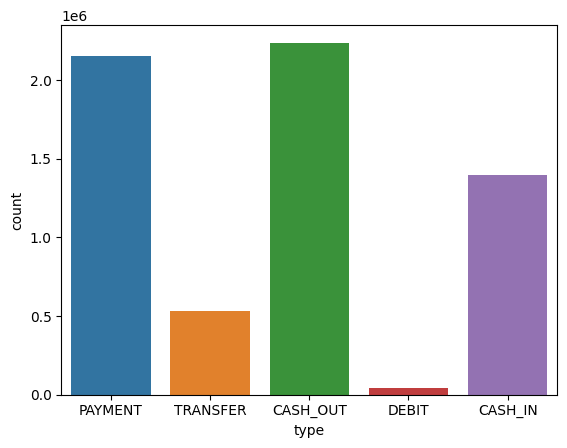

In [ ]:
sns.countplot(x='type', data=data)

In [ ]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<ipython-input-10-5150050a6f29>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

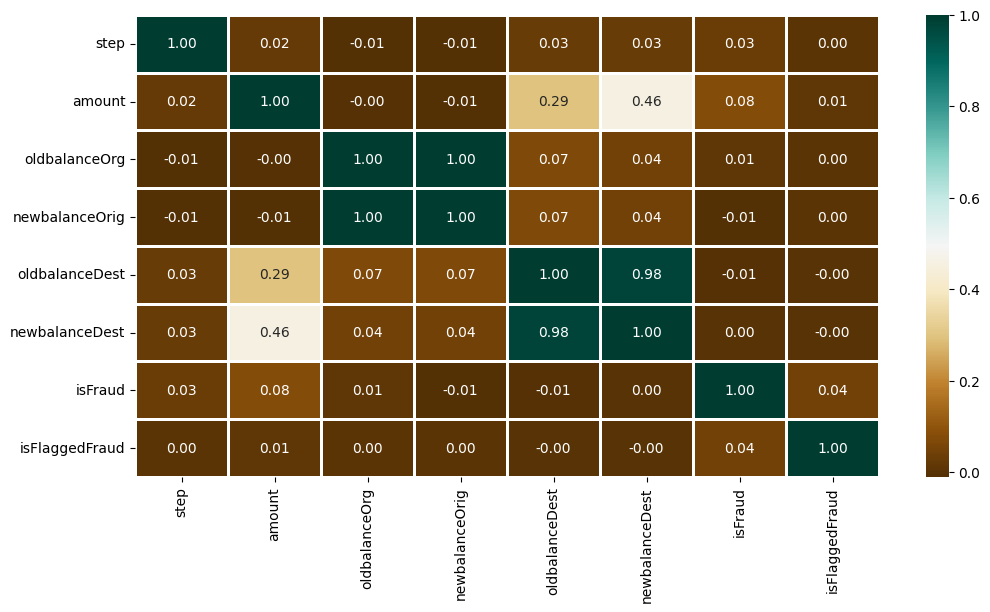

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,3,710400,757869,587897,1157557,1662094,0,0,0,0
1,0,3,141767,2188998,140919,336044,1733924,0,0,0,0
2,0,4,13666,1002156,1672,0,439685,0,0,1,0
3,0,1,13666,5828262,1672,0,391696,82843,0,1,0
4,0,3,822964,3445981,230032,456430,828919,0,0,0,0


In [ ]:
X=data.drop(columns=['isFraud','nameOrig','nameDest'])
y=data['isFraud']

In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0,3,710400,587897,1157557,0,0,0
1,0,3,141767,140919,336044,0,0,0
2,0,4,13666,1672,0,0,0,0
3,0,1,13666,1672,0,82843,0,0
4,0,3,822964,230032,456430,0,0,0
...,...,...,...,...,...,...,...,...
6362615,742,1,4593321,847926,0,0,1040878,0
6362616,742,4,5311231,1555414,0,0,0,0
6362617,742,1,5311231,1555414,0,243224,3327127,0
6362618,742,4,5160929,1084856,0,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

num_features_to_select = 5
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
X_selected = selector.fit_transform(X_resampled, y_resampled)

In [ ]:
selected_feature_indices = selector.get_support()
selected_features = X.columns[selected_feature_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model1 = LogisticRegression()

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Calculate precision, recall, F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model 1 - Logistic Regression")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate G-Mean
g_mean = np.sqrt((TP / (TP + FN)) * (TN / (TN + FP)))

print("G-Mean:", g_mean)


Model 1 - Logistic Regression
Precision: 0.9540064909498465
Recall: 0.9570690976500599
F1 Score: 0.9555353402997409
Accuracy: 0.9554624093591731
G-Mean: 0.9554610021142915


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Create a Decision Tree model
model2 = DecisionTreeClassifier()

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Calculate precision, recall, F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model 2 - Decision Tree")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate G-Mean
g_mean = np.sqrt((TP / (TP + FN)) * (TN / (TN + FP)))

print("G-Mean:", g_mean)


Model 2 - Decision Tree
Precision: 0.9992582880217842
Recall: 0.999617601654227
F1 Score: 0.9994379125432826
Accuracy: 0.9994377918004157
G-Mean: 0.9994377693281229


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Create a Random Forest model
model3 = RandomForestClassifier()

# Train the model on the training data
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate precision, recall, F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model 3 - Random Forest")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate G-Mean
g_mean = np.sqrt((TP / (TP + FN)) * (TN / (TN + FP)))

print("G-Mean:", g_mean)


Model 3 - Random Forest
Precision: 0.9991280109765255
Recall: 0.9998190295894489
F1 Score: 0.9994734008434238
Accuracy: 0.9994732002944413
G-Mean: 0.9994731283501195


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_rf = model3.predict(X_test)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Confusion Matrix for Random Forest:
[[1269728    1109]
 [    230 1270696]]


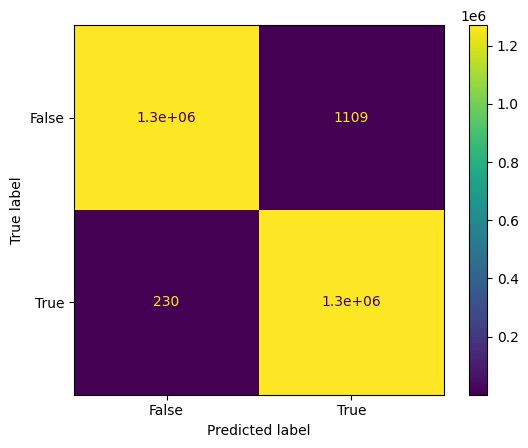

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmdisplay10=ConfusionMatrixDisplay(confusion_matrix = conf_matrix_rf , display_labels = [False, True])
cmdisplay10.plot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Create an XGBoost model
model4 = XGBClassifier()

# Train the model on the training data
model4.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model4.predict(X_test)

# Calculate precision, recall, F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model 4 - XGBoost")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate G-Mean
g_mean = np.sqrt((TP / (TP + FN)) * (TN / (TN + FP)))

print("G-Mean:", g_mean)


Model 4 - XGBoost
Precision: 0.9968296201591237
Recall: 0.9987300598146548
F1 Score: 0.9977789350600859
Accuracy: 0.9977767400029035
G-Mean: 0.9977762511673112


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Create an AdaBoost model
model5 = AdaBoostClassifier()

# Train the model on the training data
model5.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model5.predict(X_test)

# Calculate precision, recall, F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model 5 - AdaBoost")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate G-Mean
g_mean = np.sqrt((TP / (TP + FN)) * (TN / (TN + FP)))

print("G-Mean:", g_mean)


Model 5 - AdaBoost
Precision: 0.9269006839125008
Recall: 0.9681673047840709
F1 Score: 0.9470846875138303
Accuracy: 0.94590486996624
G-Mean: 0.9456420557252091


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
model6 = GaussianNB()

# Train the model on the training data
model6.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model6.predict(X_test)

# Calculate precision, recall, F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model 6 - Gaussian Naive Bayes")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate G-Mean
g_mean = np.sqrt((TP / (TP + FN)) * (TN / (TN + FP)))

print("G-Mean:", g_mean)


Model 6 - Gaussian Naive Bayes
Precision: 0.8568026666974397
Recall: 0.81787688661653
F1 Score: 0.8368873867200836
Accuracy: 0.8405870256196192
G-Mean: 0.8402809637368783


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Create a Gradient Boosting model
model7 = GradientBoostingClassifier()

# Train the model on the training data
model7.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model7.predict(X_test)

# Calculate precision, recall, F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model 7 - Gradient Boosting")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate G-Mean
g_mean = np.sqrt((TP / (TP + FN)) * (TN / (TN + FP)))

print("G-Mean:", g_mean)


Model 7 - Gradient Boosting
Precision: 0.9727416908277491
Recall: 0.996544251986347
F1 Score: 0.9844991218254837
Accuracy: 0.9843089225864096
G-Mean: 0.9842324409848936


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Create a LightGBM model
model8 = LGBMClassifier()

# Train the model on the training data
model8.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model8.predict(X_test)

# Calculate precision, recall, F1-score, accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model 8 - LightGBM")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate G-Mean
g_mean = np.sqrt((TP / (TP + FN)) * (TN / (TN + FP)))

print("G-Mean:", g_mean)


[LightGBM] [Info] Number of positive: 5083481, number of negative: 5083570
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.231808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 10167051, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499996 -> initscore=-0.000018
[LightGBM] [Info] Start training from score -0.000018
Model 8 - LightGBM
Precision: 0.9924109283257818
Recall: 0.998363398026321
F1 Score: 0.9953782641524236
Accuracy: 0.9953642412766257
G-Mean: 0.995359617513205


In [ ]:
features = np.array([[9839.64,170136.0,160296.36,0.0,0.0,]])
print(model3.predict(features))

[0]


In [ ]:
features = np.array([[1864.28,21249.0,19384.72,0.0,0.0,]])
print(model3.predict(features))

[0]


In [ ]:
features = np.array([[181.0,181.0,0.0,0.0,0.0,]])
print(model3.predict(features))

[1]


In [ ]:
features = np.array([[181.0,181.0,0.0,21182.0,0.0]])
print(model3.predict(features))

[1]
